Qno.1 Delivery time --> Predict delivery time using sorting time

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

In [3]:
data=pd.read_csv("G:\my Assignemt\Assignment 4\delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [7]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


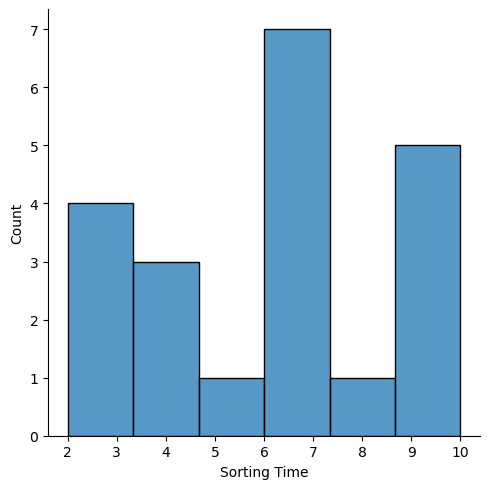

In [8]:
sns.displot(data['Sorting Time'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


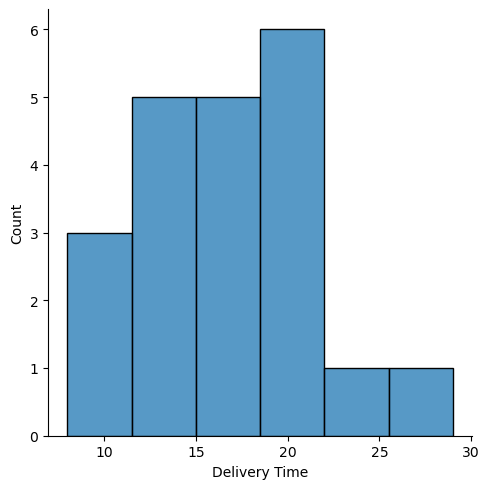

In [9]:
sns.displot(data['Delivery Time'])

In [10]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [13]:
dataset=data.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_Time'},axis=1)
dataset

,Delivery_time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<Axes: xlabel='Sorting_Time', ylabel='Delivery_time'>

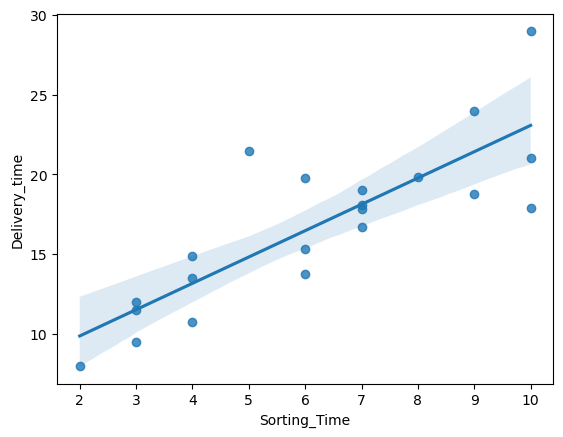

In [14]:
sns.regplot(y=dataset['Delivery_time'],x=dataset['Sorting_Time'])

In [15]:
model=sm.ols("Delivery_time~Sorting_Time",data=dataset).fit()

In [16]:
model

In [17]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [19]:
model.tvalues, model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [20]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [21]:
log_trans=np.log(dataset)

In [22]:
log_trans.head()

,Delivery_time,Sorting_Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


In [24]:
sqr_trans=dataset.transform(func='sqrt')
sqr_trans.head()

,Delivery_time,Sorting_Time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278


In [25]:
model1=sm.ols('Delivery_time~Sorting_Time',data=sqr_trans).fit()
model1

In [27]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [28]:
model1.pvalues, model1.tvalues

(Intercept       1.833621e-04
 Sorting_Time    8.475706e-07
 dtype: float64,
 Intercept       4.628248
 Sorting_Time    7.152817
 dtype: float64)

In [30]:
model1.rsquared, model1.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

2). Salary_hike --> Build aprediction model for salary_hike

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data1=pd.read_csv("G:\my Assignemt\Assignment 4\Salary_Data.csv")
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [33]:
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


C:\Users\velag\AppData\Local\Temp\ipykernel_17928\1551683520.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

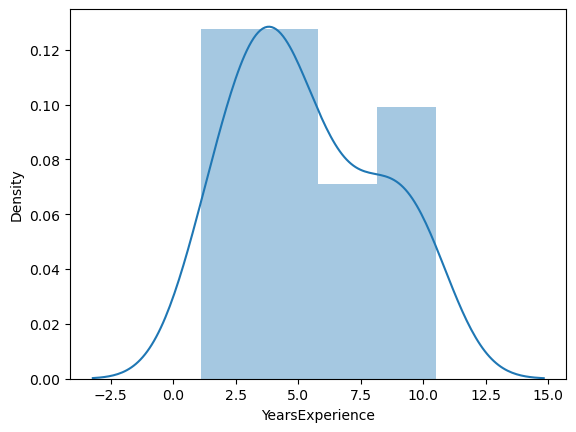

In [35]:
sns.distplot(data1['YearsExperience'])

C:\Users\velag\AppData\Local\Temp\ipykernel_17928\1629384037.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

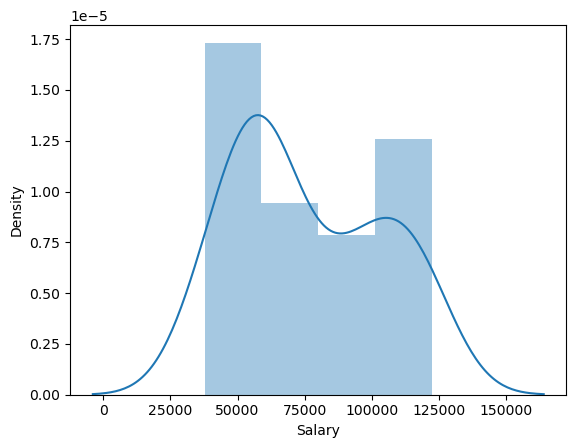

In [36]:
sns.distplot(data1['Salary'])

<Axes: xlabel='Salary', ylabel='YearsExperience'>

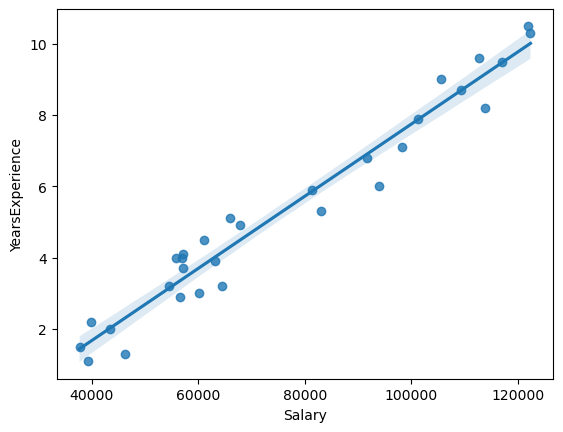

In [38]:
sns.regplot(y=data1['YearsExperience'],x=data1['Salary'])

In [50]:
import statsmodels.formula.api as smf

In [52]:

model=smf.ols('YearsExperience~Salary',data=data1).fit()
model

In [53]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [54]:
model.pvalues,model.tvalues

(Intercept    6.300123e-08
 Salary       1.143068e-20
 dtype: float64,
 Intercept    -7.281283
 Salary       24.950094
 dtype: float64)

In [55]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [56]:
log_transform=np.log(data1)

In [57]:
log_transform.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


In [58]:
sqr_transfrom=data1.transform(func='sqrt')

In [60]:
sqr_transfrom.head()

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691
3,1.414214,208.626460
4,1.483240,199.727314


In [61]:
model2=sm.ols('YearsExperience~Salary',data=data1).fit()
model2

In [62]:
model2.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [65]:
model2.pvalues, model2.tvalues

(Intercept    6.300123e-08
 Salary       1.143068e-20
 dtype: float64,
 Intercept    -7.281283
 Salary       24.950094
 dtype: float64)

In [68]:
model2.rsquared, model2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)